# Imports

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2025-02-03 18:06:33.423204: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Preparation + Exploration

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

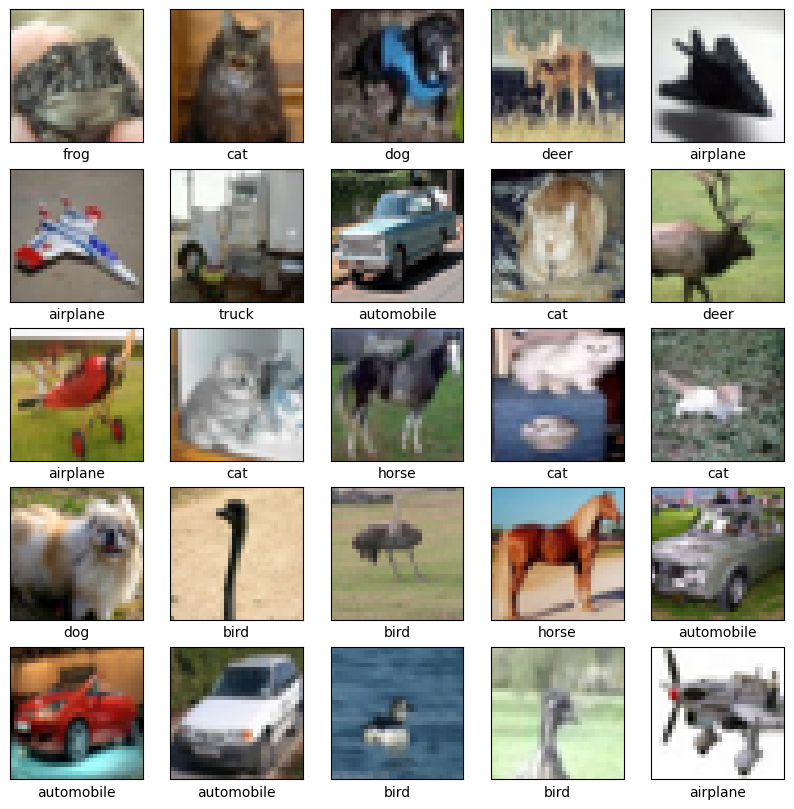

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25, 50):
    plt.subplot(5,5,i-25+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [10]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [15]:
train_class_counts = np.sum(y_train, axis = 0)
test_class_counts = np.sum(y_test, axis = 0)

print(train_class_counts)
print(test_class_counts)

[5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.]
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


In [7]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

# Models

In [8]:
simple_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
simple_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_simple = simple_cnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

simple_cnn.save_weights('simple_cnn_weights.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3477 - loss: 1.8132 - val_accuracy: 0.5160 - val_loss: 1.3730
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5451 - loss: 1.2910 - val_accuracy: 0.5610 - val_loss: 1.2489
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5869 - loss: 1.1682 - val_accuracy: 0.5856 - val_loss: 1.1833
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6283 - loss: 1.0638 - val_accuracy: 0.6089 - val_loss: 1.1370
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6568 - loss: 0.9861 - val_accuracy: 0.6209 - val_loss: 1.0982
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6741 - loss: 0.9350 - val_accuracy: 0.6146 - val_loss: 1.1277
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6949 - loss: 0.8805 - val_accuracy: 0.6242 - val_loss: 1.1105
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7069 - loss: 0.8386 - val_accuracy: 0.

In [16]:
advanced_cnn = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    # Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(256, activation='relu'),
    # Dropout(0.5),
    Dense(10, activation='softmax')
])
advanced_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_advanced = advanced_cnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

advanced_cnn.save_weights('advanced_cnn_weights.weights.h5')

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4427 - loss: 1.7170 - val_accuracy: 0.4774 - val_loss: 1.5255
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6661 - loss: 0.9631 - val_accuracy: 0.5627 - val_loss: 1.3399
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7301 - loss: 0.7674 - val_accuracy: 0.6427 - val_loss: 1.0895
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7850 - loss: 0.6102 - val_accuracy: 0.6687 - val_loss: 0.9460
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8342 - loss: 0.4816 - val_accuracy: 0.6042 - val_loss: 1.4892
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8705 - loss: 0.3705 - val_accuracy: 0.6038 - val_loss: 1.2842
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8997 - loss: 0.2848 - val_accuracy: 0.6647 - val_loss: 1.2561
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9224 - loss: 0.2308 - val_accuracy: 0.

In [17]:
advanced_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_augmented = advanced_cnn.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))

advanced_cnn.save_weights('advanced_cnn_weights_augmented.weights.h5')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.5319 - loss: 1.5040 - val_accuracy: 0.6649 - val_loss: 0.9938
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5920 - loss: 1.1623 - val_accuracy: 0.6727 - val_loss: 0.9656
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.6207 - loss: 1.0836 - val_accuracy: 0.6264 - val_loss: 1.1273
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6359 - loss: 1.0401 - val_accuracy: 0.6785 - val_loss: 0.9118
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6427 - loss: 1.0160 - val_accuracy: 0.5494 - val_loss: 1.6630
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.6560 - loss: 0.9842 - val_accuracy: 0.7191 - val_loss: 0.8251
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6621 - loss: 0.9655 - val_accuracy: 0.6812 - val_loss: 0.9357
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6765 - loss: 0.9313 - 

In [15]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
transfer_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_transfer = transfer_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

transfer_model.save_weights('transfer_model_weights.weights.h5')

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.1952 - loss: 2.0360 - val_accuracy: 0.3451 - val_loss: 1.6304
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.3831 - loss: 1.5543 - val_accuracy: 0.5148 - val_loss: 1.2875
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.5272 - loss: 1.2606 - val_accuracy: 0.5732 - val_loss: 1.1961
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.6284 - loss: 1.0308 - val_accuracy: 0.6856 - val_loss: 0.9070
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7187 - loss: 0.8190 - val_accuracy: 0.7179 - val_loss: 0.8303
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7644 - loss: 0.6940 - val_accuracy: 0.7440 - val_loss: 0.7911
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7999 - loss: 0.5928 - val_accuracy: 0.7543 - val_loss: 0.7423
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8221 - loss: 0.5250 - 

In [18]:
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_augmented = transfer_model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))

transfer_model.save_weights('transfer_cnn_weights_augmented.weights.h5')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.6698 - loss: 0.9977 - val_accuracy: 0.7310 - val_loss: 0.8390
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7144 - loss: 0.8542 - val_accuracy: 0.7532 - val_loss: 0.7861
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7336 - loss: 0.8015 - val_accuracy: 0.7664 - val_loss: 0.7346
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7465 - loss: 0.7686 - val_accuracy: 0.7715 - val_loss: 0.7206
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7601 - loss: 0.7374 - val_accuracy: 0.7842 - val_loss: 0.6853
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7670 - loss: 0.7151 - val_accuracy: 0.7959 - val_loss: 0.6425
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7713 - loss: 0.6897 - val_accuracy: 0.7820 - val_loss: 0.6689
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7808 - loss: 0.6687 - 

In [14]:
base_model.trainable

True

# Comparing

In [25]:
import plotly.graph_objects as go

def plot_combined_training_history(histories, labels, title):
    fig = go.Figure()
    
    # Add traces for each history
    for history, label in zip(histories, labels):
        # Train Accuracy
        fig.add_trace(go.Scatter(
            y=history.history['accuracy'],
            mode='lines',
            name=f'{label} - Train Accuracy',
            line=dict(dash='solid')
        ))
        # Validation Accuracy
        fig.add_trace(go.Scatter(
            y=history.history['val_accuracy'],
            mode='lines',
            name=f'{label} - Validation Accuracy',
            line=dict(dash='dash')
        ))
    
    # Update layout
    fig.update_layout(
        title=title,
        xaxis=dict(title='Epoch'),
        yaxis=dict(title='Accuracy'),
        legend=dict(title='Legend'),
        template='plotly_white',
        width=1400,
        height=600
    )
    
    # Show plot
    fig.show()

# Prepare inputs
histories = [history_simple, history_advanced, history_transfer, history_augmented]
labels = ["Simple CNN", "Advanced CNN", "VGG16", "Advanced, augmented"]

# Plot combined history
plot_combined_training_history(histories, labels, "Porównanie dokładności modeli")



In [ ]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Macierz konfuzji
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Przewidywane')
    plt.ylabel('Prawdziwe')
    plt.title('Macierz konfuzji')
    plt.show()
    
    # Raport klasyfikacji
    print(classification_report(y_true, y_pred_classes, target_names=class_names))

print("Ocena prostego modelu:")
evaluate_model(simple_cnn, x_test, y_test)

print("\nOcena ulepszonego modelu:")
evaluate_model(advanced_cnn, x_test, y_test)
